<h1 align="center">WEB SCRAPING COM R</h1>
<h2 align="center">Dados das Espécies Ameaçadas de Extinção no Brasil</h2>

<h3>1. Introdução</h3>
<p style="text-align:justify">A Portaria MMA 300/2022 revogou as Portarias 443/2014, 444/2014 e 445/2014, as quais em seua anexos definiam as listas de espécie da flora, fauna e peixes e invertebrados aquáticos ameaçados de extinção no Brasil. Estas listas foram atualizadas e hoje fazem parte da Portaria MMA 300/2022. Os dados aqui utilizados foram obtidos em 14 de dezembro de 2022.</p>
<p style="text-align:justify"></p>
<p style="text-align:justify">O objetivo deste <i>notebook</i> é utilizar a técncia <i>web scraping</i> para extrair as tabelas referentes as espécies da flora, fauna brasileiras ameçadas de extinção, conforme <a href="http://www.in.gov.br/web/dou/-/portaria-gm/mma-n-300-de-13-de-dezembro-de-2022-450425464">Portaria MMA nº 300</a>, de 13 de dezembro de 2022. Para tal utilizaremos a linguagem de programação R</p>

### 2. Import pacotes necessários

In [ ]:
# Import libraries
library(rvest)
library(dplyr, warn.conflicts = FALSE)
library(ggplot2)

### 3. Definição do endereço web

In [2]:
# Set url
url = 'https://www.in.gov.br/en/web/dou/-/portaria-gm/mma-n-300-de-13-de-dezembro-de-2022-450425464'

### 4. Aplicando a técnica _web scraping_

In [158]:
# web scraping the url
tab_lst <- url %>%
        read_html() %>%
        html_nodes(xpath = '//table') %>%
        html_table(header = FALSE)

### 5. Obter informações dos dados

In [ ]:
glimpse(tab_lst)

In [4]:
length(tab_lst)

[1] 96

In [150]:
# FLORA - lists 1-65
head(tab_lst[[65]])

X1,X2,X3,X4,X5
<int>,<chr>,<chr>,<chr>,<chr>
3171,,Vochysiaceae,Vochysiagummifera,EN
3172,,Vochysiaceae,Vochysiamapuerae,VU
3173,,Vochysiaceae,Vochysiaoblongifolia,EN
3174,*,Vochysiaceae,Vochysiapygmaea,EN
3175,,Vochysiaceae,Vochysiarotundifolia,EN
3176,,Vochysiaceae,Vochysia rufescens,VU


In [169]:
# Fauna - lists 66-95
head(tab_lst[[83]])

X1,X2,X3,X4,X5,X6
<chr>,<chr>,<chr>,<chr>,<chr>,<chr>
ANEXO 3. LISTA NACIONAL DE ESPÉCIES DA FAUNA AQUÁTICA AMEAÇADA DE EXTINÇÃO,ANEXO 3. LISTA NACIONAL DE ESPÉCIES DA FAUNA AQUÁTICA AMEAÇADA DE EXTINÇÃO,ANEXO 3. LISTA NACIONAL DE ESPÉCIES DA FAUNA AQUÁTICA AMEAÇADA DE EXTINÇÃO,ANEXO 3. LISTA NACIONAL DE ESPÉCIES DA FAUNA AQUÁTICA AMEAÇADA DE EXTINÇÃO,ANEXO 3. LISTA NACIONAL DE ESPÉCIES DA FAUNA AQUÁTICA AMEAÇADA DE EXTINÇÃO,ANEXO 3. LISTA NACIONAL DE ESPÉCIES DA FAUNA AQUÁTICA AMEAÇADA DE EXTINÇÃO
,#,Ordem,Família,Espécie ou Subespécie,Categoria
,,INVERTEBRADOS AQUÁTICOS,INVERTEBRADOS AQUÁTICOS,INVERTEBRADOS AQUÁTICOS,
1,,Amphipoda,Artesiidae,Spelaeogammarusbahiensis,VU
2,,Amphipoda,Artesiidae,Spelaeogammarussanctus,CR
3,,Amphipoda,Artesiidae,Spelaeogammarussantanensis,CR


<p style="text-align=justify">Ao inspercionar os dados podemos verificar que temos uma lista composta por 96 <i>dataframes</i>, sendo que o último é um dado que não faz parte das tabelas da fauna e flora, o que deveremos excluí-lo da lista.</p>
<p style="text-align=justify">Também é possível verificar que os elementos da lista de 1 a 65 são referentes as tabelas da flora, o restante refere-se as espécies da fauna. Os dataframes de flora possuem 5 colunas, enquato que os da fauna 6</p>

In [170]:
# Remove undesirable data
tab_lst[[96]] <- NULL

### 5. Limpeza de dados
<p style="text-alig:justify">Precisamos redefinir os nomes das colunas para os dados de fauna e flora, pois possuem número de colunas diferentes, o que permitira unir todos em um único <i>dataframe</i></p>

In [171]:
# Set column names for each dataframe in a list
for (i in 1:length(tab_lst)) {
    if (length(unlist(attributes(tab_lst[[i]])[2])) == 5) {
        names(tab_lst[[i]]) <- c('n', 'port443', 'familia',
                                 'especie_subespecie_var', 
                                 'categoria')
    }
    else {
        if (length(unlist(attributes(tab_lst[[i]])[2])) == 6) {
            names(tab_lst[[i]]) <- c('n', 'ordem', 'port443',
                                   'familia', 'especie_subespecie', 
                                   'categoria')
        }
    }
}

# Check attributes       
names(tab_lst[[1]])  # flora
names(tab_lst[[94]]) # fauna

[1] "n"                      "port443"                "familia"               
[4] "especie_subespecie_var" "categoria"

[1] "n"                  "ordem"              "port443"           
[4] "familia"            "especie_subespecie" "categoria"

<p style="text-align:justify">Chama atenção o fato de muitas espécies, tanto da flora quanto da fauna, estarem com a grafia do nome científico errado, a exemplo de <i>Vochysia gummifera</i>, a qual está grafada como <i>Vochysiagummifera</i>, o que pode induzir o público leigo a erros quando busca por expécies ameaçadas. O trecho de código abaixo mostra o número total de espécies da flora que apresentam erro grave de grafia.</p>

In [65]:
sum(is.na(stringr::str_extract(df$especie_subespecie_var, '\\w+\\s\\w+')))

[1] 1947

### 5.1 Extrair apenas os dados referentes à flora e salvá-los em planilha csv

In [72]:
# Subset the flora dataframes in the list
df_list <- tab_lst[1:65]

# Loop over the list to merge all flora dataframes in a single dataframe
for (i in 1:65) {
    
    df_list[[i]][1] <- NULL
    df <- bind_rows(df_list)
    df <- df[c(-1, -2), c(1:4)]
    df <- df %>% 
        tibble::rowid_to_column(var = 'n')
    
    df <- df[complete.cases(df), ]
    
    write.csv2(
        df, './port_mma300_2022_flora.csv', 
        row.names = FALSE)
    
}

### 5.2 Correção dos Nomes Científicos
<p style="text-align:justify">Para corrigir os erros de grafia nos nomes científicos usaremos como referência a lista de espécies do projeto <a href="https://reflora.jbrj.gov.br/reflora">REFLORA, cuja base de dados encontra-se no <a href="http://ipt.jbrj.gov.br/jbrj/archive.do?r=lista_especies_flora_brasil&v=393.291">site do jardim botânico do Rio de Janeiro</a></p>

In [ ]:
require('fuzzyjoin')

# Portaria MMA 300/2022
port300 <- read.csv2('C:/Users/67147020278/Documents/Web_Scraping_R/Portaria_MMA_300-2022/port_mma300_2022_flora.csv',
                     fileEncoding = 'UTF-8')

# Reflora
reflora <- read.csv2('C:/Users/67147020278/Documents/reflora20210706.csv',
                     fileEncoding = 'UTF-8')

# Join
tbl_join <- fuzzyjoin::stringdist_inner_join(port300, reflora,
                                           by = c('especie_subespecie_var' = 'specie'),
                                           ignore_case = TRUE,
                                           distance_col = 'distance')


df <- tbl_join %>%
        filter(distance < 2) %>%
        distinct(n, .keep_all = TRUE) %>%
        select(c(1:3, 7, 5))


# salvar como csv
#write.csv2(df, './port_MMA_300-2022_clean.csv', row.names = FALSE)

In [ ]:
# Consultas
df %>%
        filter(specie == stringr::str_extract(specie, '(^Manilkara\\s\\w+)*'))

### 5.3 Extrair apenas os dados referentes à fauna e salvá-los em planilha csv

In [ ]:
# Subset the flora dataframes in the list
df_list_fauna <- tab_lst[66:95]

# Loop over the list to merge all flora dataframes in a single dataframe
for (i in 1:length(df_list_fauna)) {
    
    df_list_fauna <- lapply(df_list_fauna, function(x) { x[!is.na(x)] }) 
    df_list_fauna[[i]][1] <- NULL
    df_fauna <- bind_rows(df_list_fauna)
    df_fauna <- df_fauna[c(-1, -2, -3), c(1:5)]
    df_fauna <- df_fauna %>% 
        tibble::rowid_to_column(var = 'n')
    
    df_fauna <- df_fauna[complete.cases(df_fauna), ]
    
    write.csv2(
        df_fauna, './port_mma300_2022_fauna.csv', 
        row.names = FALSE)
    
}

### 6. Análise dos dados de flora

In [73]:
# Portaria MMA 443
port443 <- read.csv('D:/data/jbrio/port443.csv')

df_flora <- data.frame(Portaria_443 = nrow(port443),
                       Portaria_300 = nrow(df),
                       Diferença = (nrow(df) - nrow(port443)))

as_tibble(df_flora)

Portaria_443,Portaria_300,Diferença
<int>,<int>,<int>
2113,3112,999


<p style="text-align=justify">Podemos observar que houve um acrescimo de 999 novas espécies ameaçadas de extinção para a flora brasileira.</p>

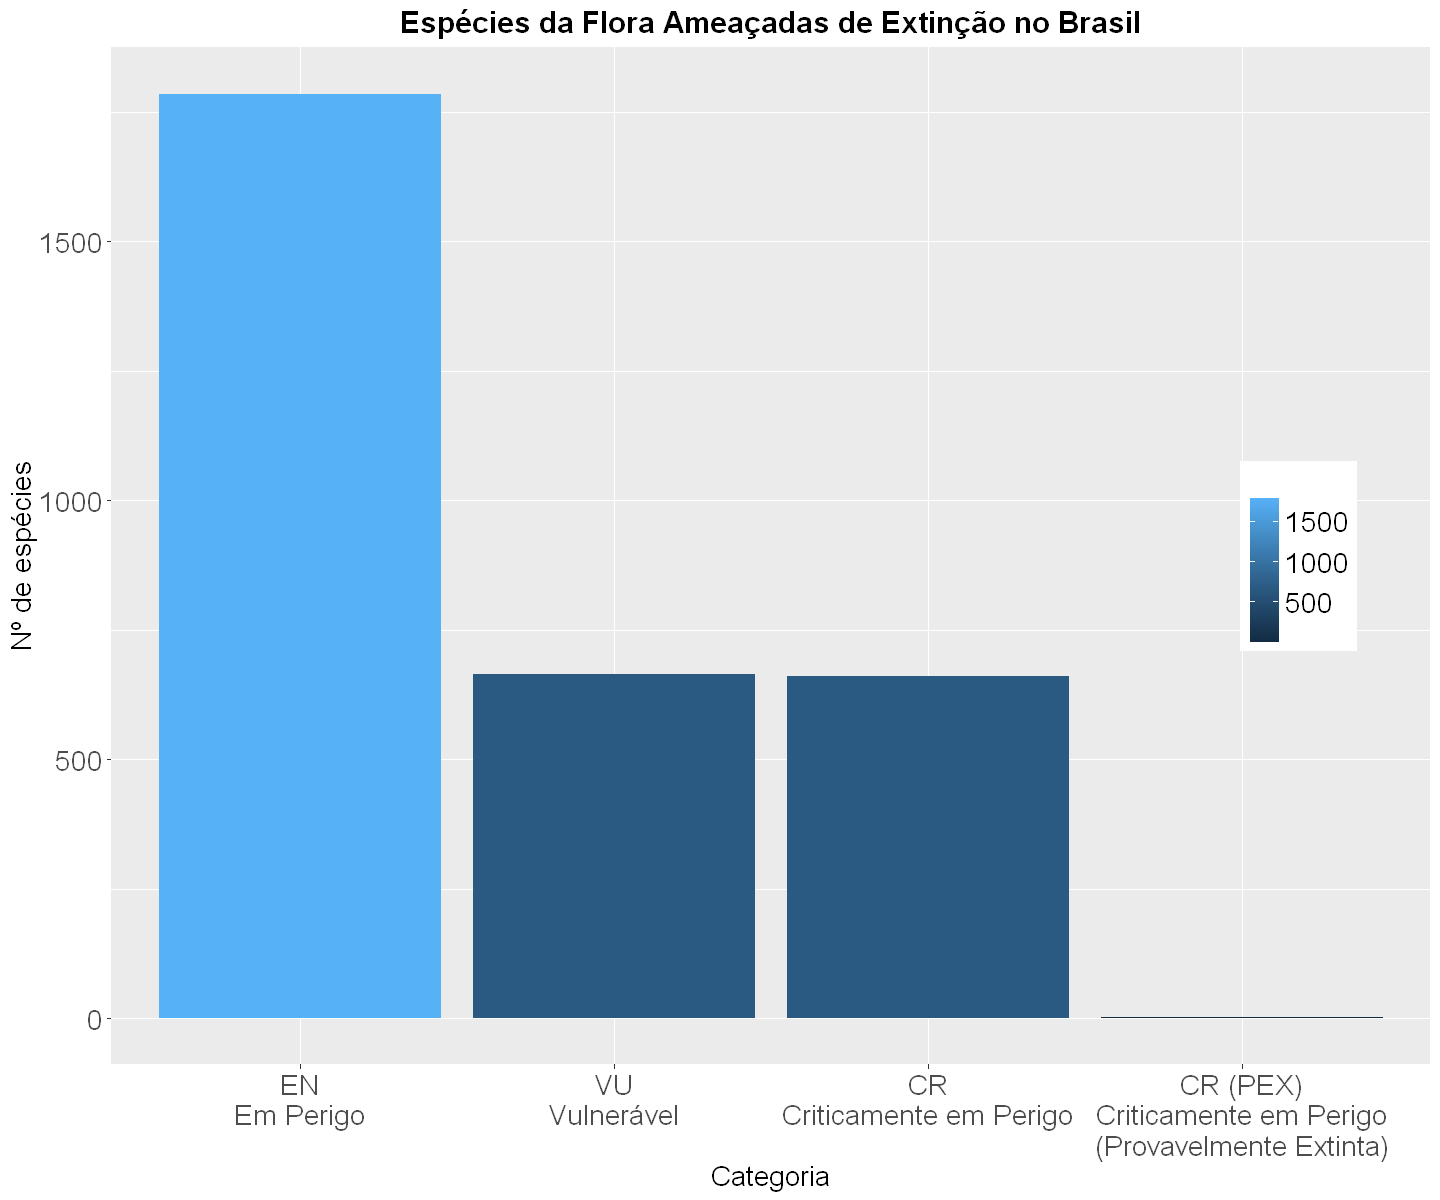

In [133]:
# Set figure size
options(repr.plot.width = 12, repr.plot.height = 10)

# Set theme to the plots
my_theme <- theme(plot.title = element_text(hjust = 0.5, size = 18, face = 'bold'),
          axis.title = element_text(size = 17),
          axis.text = element_text(size = 17),
          legend.text = element_text(size = 17),
          legend.position = c(0.9, 0.5))

# Set status dataframe
species_status <- df %>%
        group_by(categoria) %>%
        count(categoria, sort = TRUE)
# Reorder status dataframe by "n" and "categoria" columns
species_status$categoria <- with(species_status, 
                                 reorder(categoria, n, decreasing = TRUE))

# Legend
labels <- c('EN\nEm Perigo', 'VU\nVulnerável', 'CR\nCriticamente em Perigo', 
            'CR (PEX)\nCriticamente em Perigo\n(Provavelmente Extinta)')

status_cod <- c('EN' , 'VU', 'CR' , 'CR (PEX)')

# Status plot        
ggplot(species_status, aes(x = categoria, y = n, fill = n)) +
    geom_col() +
    my_theme +
    scale_x_discrete(limits = status_cod, labels = labels) +
    labs(
            title = 'Espécies da Flora Ameaçadas de Extinção no Brasil',
            x = 'Categoria',
            y = 'Nº de espécies',
            fill = ''
    )

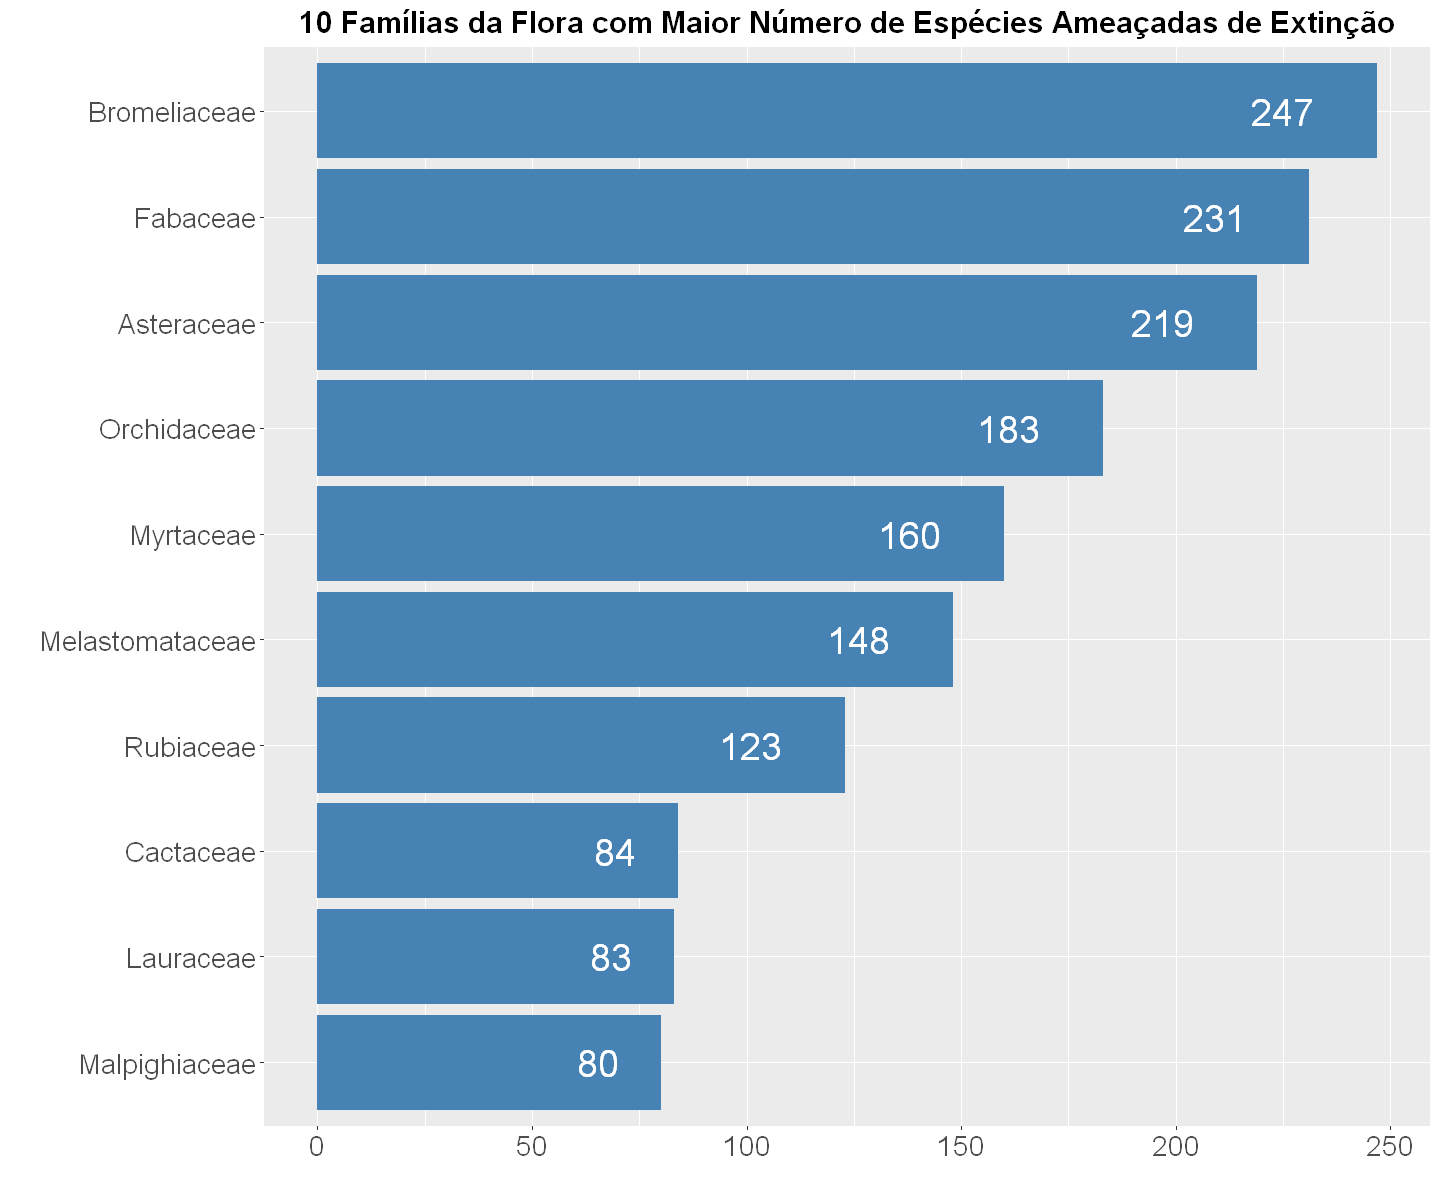

In [140]:
# Set figure size
options(repr.plot.width = 12, repr.plot.height = 10)

statusFamily <- df %>%
        #filter(familia != "") %>%
        count(familia, sort = TRUE) %>%
        slice_max(n, n = 10)

statusFamily$familia <- with(statusFamily, reorder(familia, n))

ggplot(statusFamily, aes(familia, n)) +
        geom_col(fill = 'steelblue') + coord_flip() +
        geom_text(aes(label = n, hjust = 2), color = 'white', size = 8) +
        my_theme +
        labs(
                title = '10 Famílias da Flora com Maior Número de Espécies Ameaçadas de Extinção',
                x = '',
                y = ''
            )

<p style="text-align:justify">Ao comparar a lista da Portaria MMA 300/2022 com a lista de espécies do projeto REFLORA, foi obervado que há 15 nomes cientificos com grafia de sinônimo taxonômico</p>

In [ ]:
lista_completa <- tbl_join %>%
        select(c(-4)) %>%
        distinct(n, .keep_all = TRUE)
        

nrow(lista_completa[!is.na(lista_completa$acceptedNameUsage), ])